<a href="https://colab.research.google.com/github/Abhi0823/Iris-Flower-Classification/blob/main/CaloriesBurn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
exercise_data = pd.read_csv('exercise.csv')
calories_data = pd.read_csv('calories.csv')
df=pd.concat([exercise_data,calories_data],axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,User_ID,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,14733363,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,14861698,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,11179863,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,16180408,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,17771927,35.0


In [5]:
df=df.drop('User_ID',axis=1)
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
df.isnull().sum()
df.shape

(15000, 8)

In [7]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [9]:
numerical_columns=df.columns[1:]
n_cols=3
n_rows=int(np.ceil(len(numerical_columns)/n_cols))

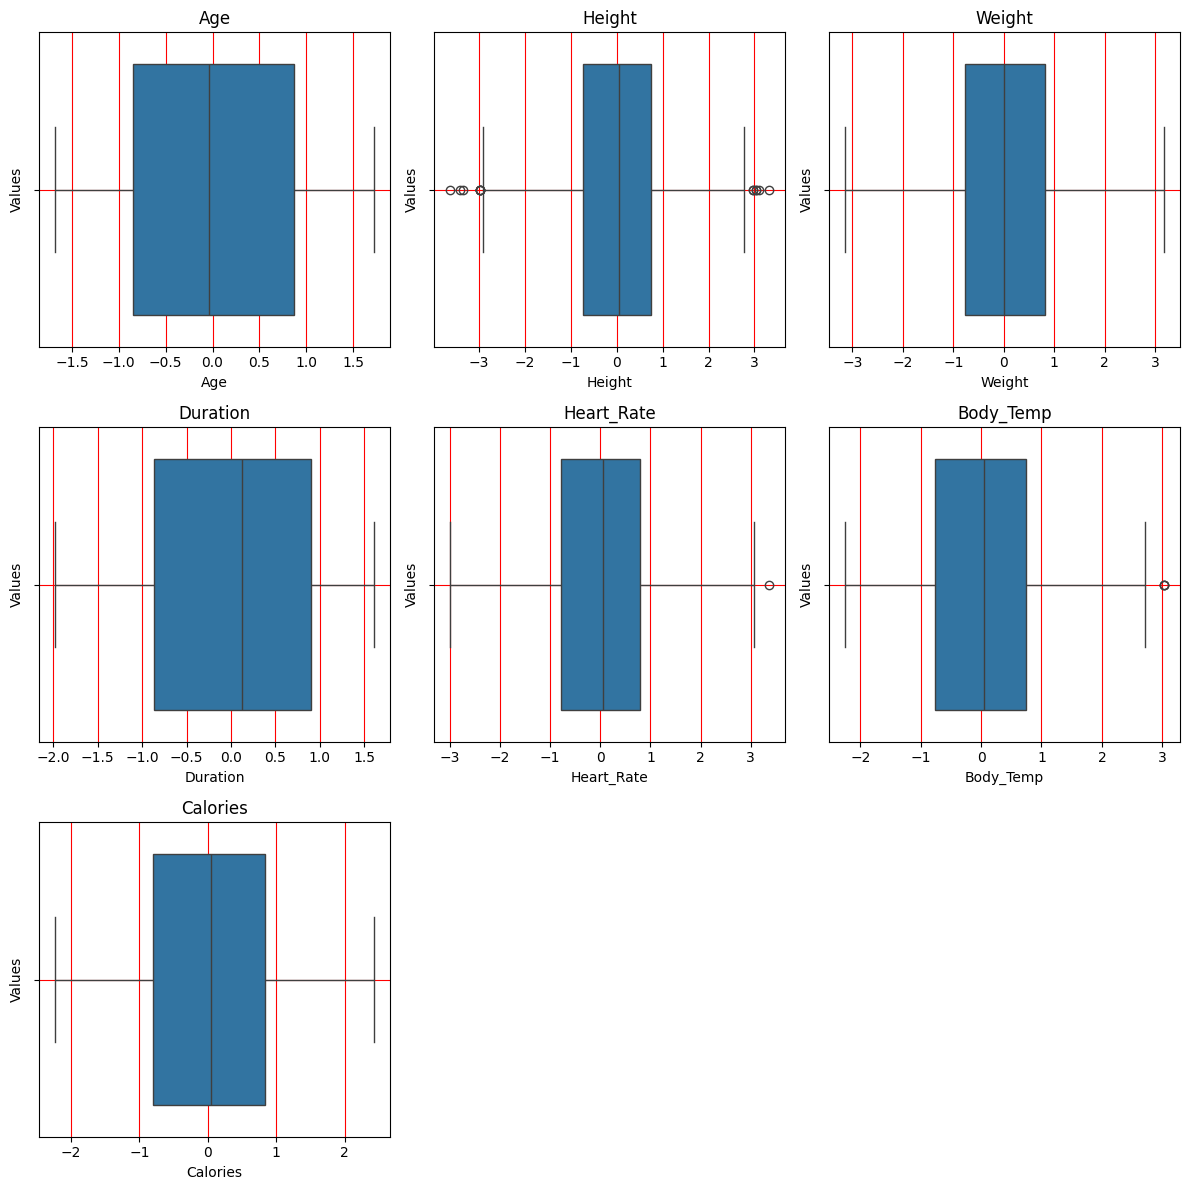

In [32]:
fig,axes=plt.subplots(n_rows,n_cols,figsize=(4*n_cols,4*n_rows))
axes=axes.flatten()
for index, column in enumerate(numerical_columns):
    sns.boxplot(data=df,x=column,ax=axes[index])
    axes[index].set_title(column)
    axes[index].set_ylabel('Values')
    axes[index].grid(True,color='red')

for i in range (len(numerical_columns),len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



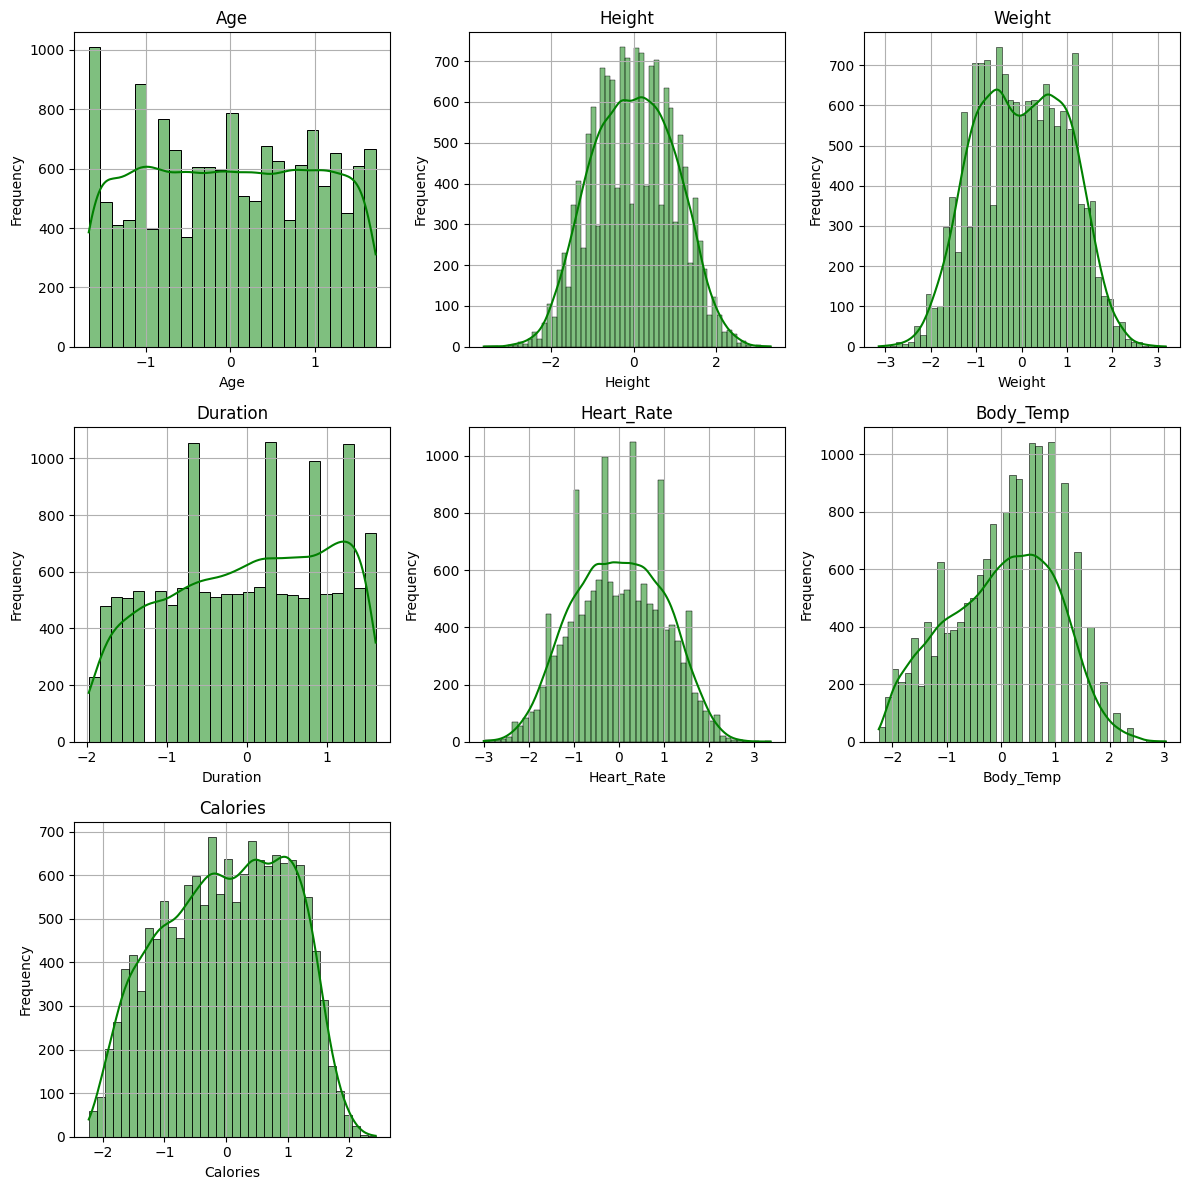

In [33]:
fig,axes=plt.subplots(n_rows,n_cols,figsize=(4*n_cols,4*n_rows))
axes=axes.flatten()
for index, column in enumerate(numerical_columns):
    sns.histplot(data=df,x=column,ax=axes[index],kde=True,color='green')
    axes[index].set_title(column)
    axes[index].set_ylabel('Frequency')
    axes[index].grid(True)

for i in range (len(numerical_columns),len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [19]:
for column in numerical_columns:
    print(column,':',df[column].skew())

Age : 0.47338270096138746
Height : -0.006189620437893538
Weight : 0.22672530725814513
Duration : 0.0047505366680978415
Heart_Rate : -0.01070407972854895
Body_Temp : -0.9943824155974582
Calories : 0.5053713740451047


In [26]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
df[numerical_columns]=pt.fit_transform(df[numerical_columns])

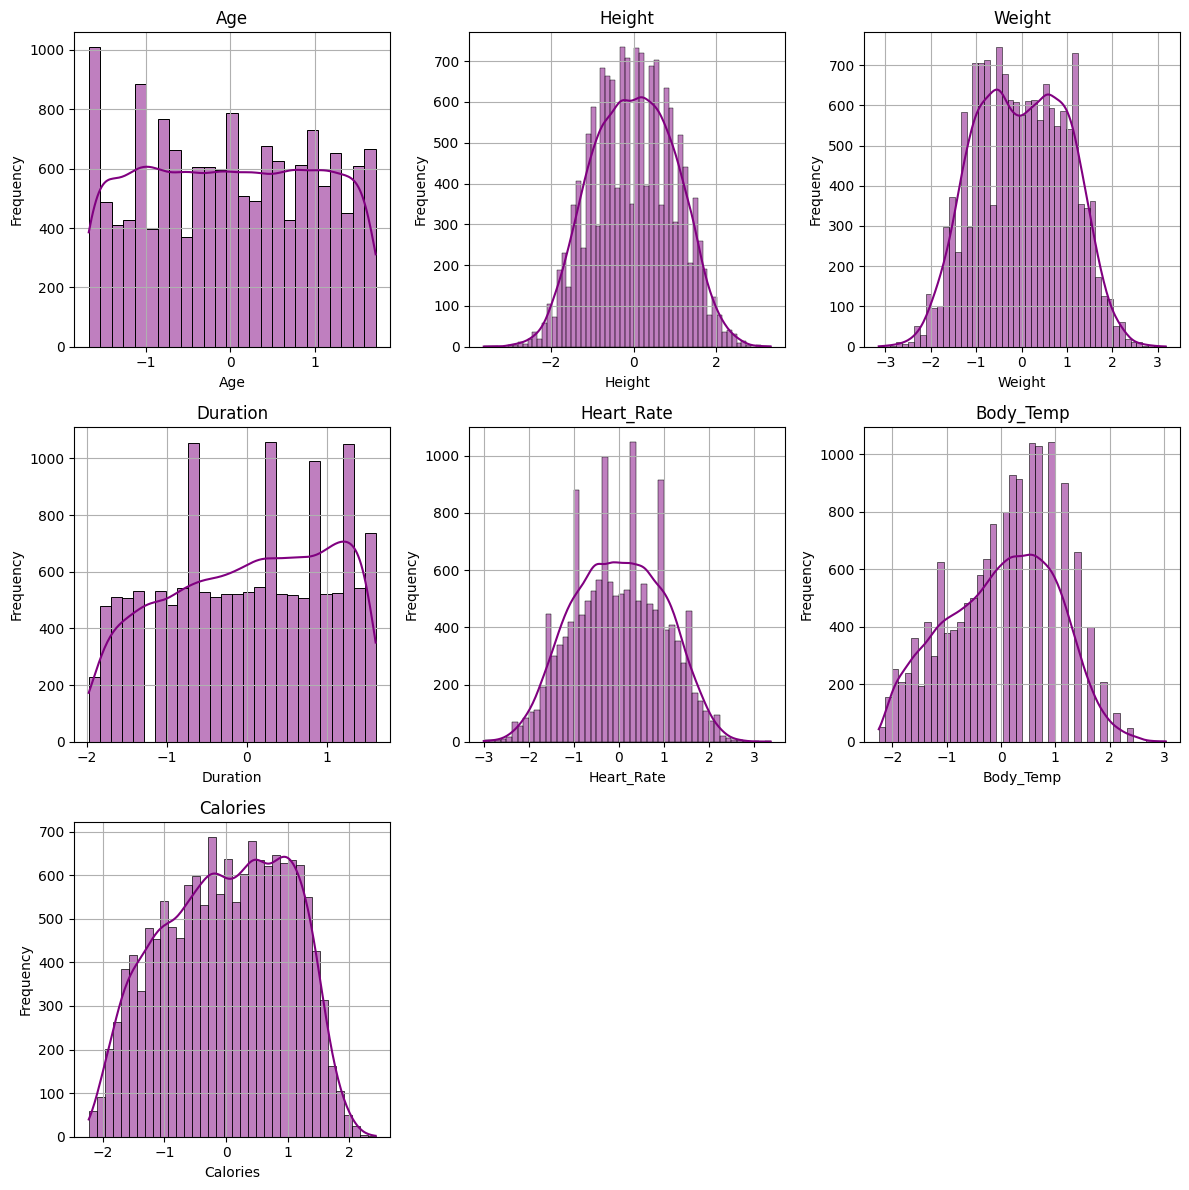

In [29]:
fig,axes=plt.subplots(n_rows,n_cols,figsize=(4*n_cols,4*n_rows))
axes=axes.flatten()
for index, column in enumerate(numerical_columns):
    sns.histplot(data=df,x=column,ax=axes[index],kde=True,color='purple')
    axes[index].set_title(column)
    axes[index].set_ylabel('Frequency')
    axes[index].grid(True)

for i in range (len(numerical_columns),len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [28]:
df['Gender']=pd.factorize(df['Gender'])[0]
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,1.348857,1.089206,1.234770,1.509909,0.989317,1.162547,1.766246
1,1,-1.678388,-0.592617,-0.998511,-0.106712,-0.156084,0.204772,-0.162223
2,0,1.385282,0.319475,0.327873,-1.295396,-0.783503,-1.551261,-1.031625
3,1,-0.374599,0.319475,-0.202239,-0.226825,0.469428,0.556529,-0.077165
4,1,-0.943419,-1.437039,-1.153216,-0.601668,-1.518083,-0.521098,-0.793410


In [59]:
from sklearn.model_selection import train_test_split # Import the train_test_split function

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

x=df.iloc[:,:-7]
y=df.iloc[:,-7]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=102) # Now you can call the train_test_split function

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

y_pred_train = rfr.predict(x_train)  # Predict on training data
y_pred = rfr.predict(x_test)  # Predict on testing data


print('Trained Data :-')
print('Accuracy : ', r2_score(y_train , y_pred_train))  # Use y_train and y_pred_train
print('Mean Absolute Error :',mean_absolute_error(y_train,y_pred_train))  # Use y_train and y_pred_train
print('Mean Squared Error :',mean_squared_error(y_train,y_pred_train))  # Use y_train and y_pred_train
print('Root Mean Squared Error :',mean_squared_error(y_train,y_pred_train,squared=False))  # Use y_train and y_pred_train

print('\nTest Data :-')
print('Accuracy :',r2_score(y_test, y_pred))  # Use y_test and y_pred
print('Mean Absolute Error :',mean_absolute_error(y_test, y_pred))  # Use y_test and y_pred
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))  # Use y_test and y_pred
print('Root Mean Squared Error :',mean_squared_error(y_test, y_pred,squared=False))  # Use y_test and y_pred

Trained Data :-
Accuracy :  8.249438701213307e-05
Mean Absolute Error : 0.8659442621209813
Mean Squared Error : 1.0013695280040562
Root Mean Squared Error : 1.0006845297115652

Test Data :-
Accuracy : -0.0018676210618955302
Mean Absolute Error : 0.8673779739675324
Mean Squared Error : 0.9948454893598102
Root Mean Squared Error : 0.9974194149703575


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

y_pred_train = xgb.predict(x_train)  # Predict on training data
y_pred = xgb.predict(x_test)  # Predict on testing data


print('Trained Data :-')
print('Accuracy : ', r2_score(y_train , y_pred_train))  # Use y_train and y_pred_train
print('Mean Absolute Error :',mean_absolute_error(y_train,y_pred_train))  # Use y_train and y_pred_train
print('Mean Squared Error :',mean_squared_error(y_train,y_pred_train))  # Use y_train and y_pred_train
print('Root Mean Squared Error :',mean_squared_error(y_train,y_pred_train,squared=False))  # Use y_train and y_pred_train

print('\nTest Data :-')
print('Accuracy :',r2_score(y_test, y_pred))  # Use y_test and y_pred
print('Mean Absolute Error :',mean_absolute_error(y_test, y_pred))  # Use y_test and y_pred
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))  # Use y_test and y_pred
print('Root Mean Squared Error :',mean_squared_error(y_test, y_pred,squared=False))  # Use y_test and y_pred

Trained Data :-
Accuracy :  8.649987764897116e-05
Mean Absolute Error : 0.8659298632908727
Mean Squared Error : 1.0013655166968773
Root Mean Squared Error : 1.0006825254279588

Test Data :-
Accuracy : -0.0020601317317900936
Mean Absolute Error : 0.8674376865322991
Mean Squared Error : 0.9950366507144361
Root Mean Squared Error : 0.997515238336957


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
